# Testing the measure with a Pairwise graph as a 3-Hypergraph

In [27]:
import numpy as np
import xgi
import networkx as nx
import copy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import kendalltau as KT

from hyperfunctions import *

In [2]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [3]:
n = 10
samples = 10

## Erdös-Renyi

In [4]:
G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

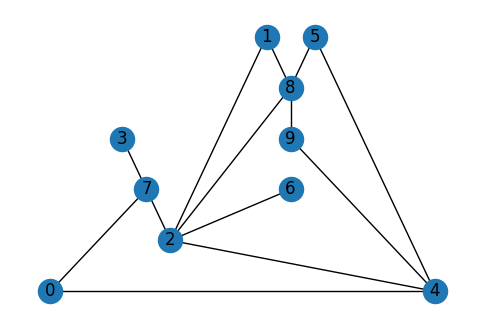

In [43]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

nx.draw_planar(G, ax=ax, with_labels=True)

In [5]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [41]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, node_labels=True, font_color_nodes="blue")

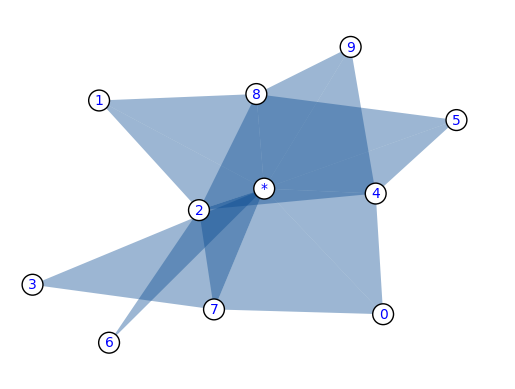

In [7]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [8]:
HEC = list(xgi.HEC_centrality(H3).values())[:-1]

In [9]:
KT(EIG, HEC).statistic

0.31462660248284624

In [10]:
EIG /= np.sum(EIG)
EIG

array([0.07365264, 0.10405424, 0.17337425, 0.02863293, 0.13968717,
       0.09319725, 0.0558767 , 0.08884227, 0.14948529, 0.09319725])

In [11]:
HEC /= np.sum(HEC)
HEC

array([0.09089232, 0.12362622, 0.10283014, 0.09783143, 0.13770767,
       0.12464586, 0.07087842, 0.06124846, 0.09516974, 0.09516974])

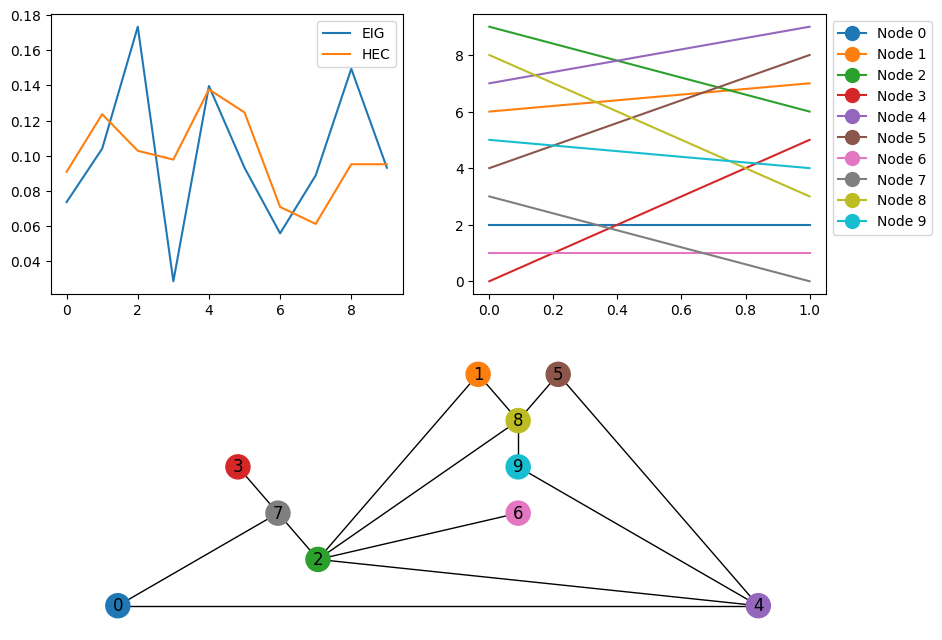

In [54]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(EIG, label='EIG')
ax1.plot(HEC, label='HEC')
ax1.legend()

# Second figure

sortEIG = np.argsort(np.argsort(EIG))
sortHEC = np.argsort(np.argsort(HEC))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

legend_elements = []
for i in range(len(sortEIG)):
    ax2.plot([0,1], [sortEIG[i], sortHEC[i]], color=colors[i])
    legend_elements.append(Line2D([0], [0], marker='o', color=colors[i], label=f'Node {i}', linestyle=None, markersize=10))

ax2.legend(handles=legend_elements, bbox_to_anchor=(1,1))


# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(sortEIG)])



## Scale-free

In [55]:
G = nx.barabasi_albert_graph(n, 2)

In [56]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [59]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, with_labels=True)

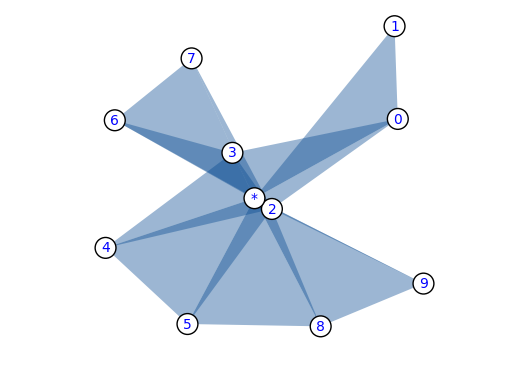

In [60]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [119]:
HEC = list(xgi.HEC_centrality(H3).values())[:-1]

In [120]:
KT(EIG, HEC).statistic

0.7777777777777777

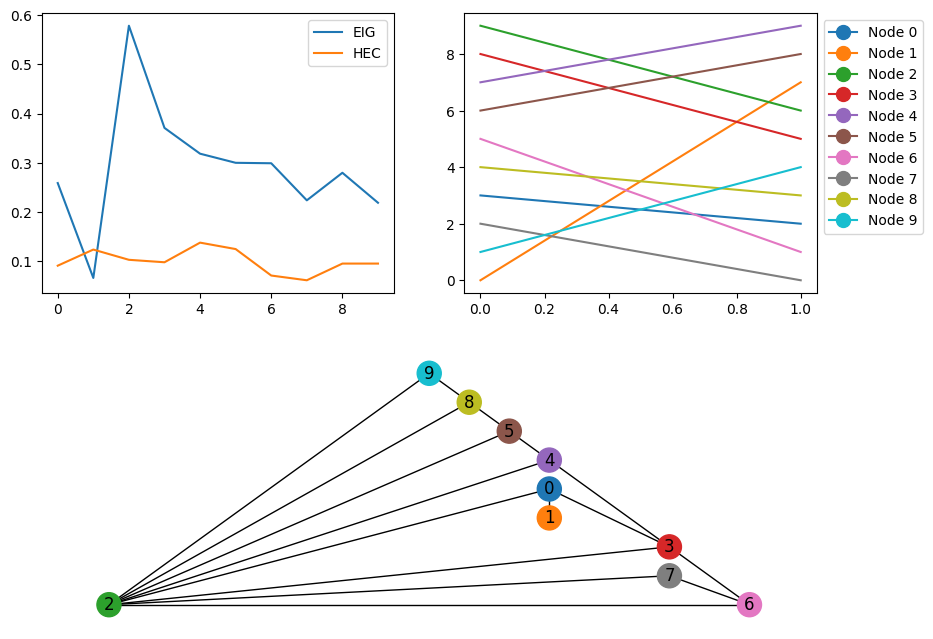

In [61]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(EIG, label='EIG')
ax1.plot(HEC, label='HEC')
ax1.legend()

# Second figure

sortEIG = np.argsort(np.argsort(EIG))
sortHEC = np.argsort(np.argsort(HEC))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

legend_elements = []
for i in range(len(sortEIG)):
    ax2.plot([0,1], [sortEIG[i], sortHEC[i]], color=colors[i])
    legend_elements.append(Line2D([0], [0], marker='o', color=colors[i], label=f'Node {i}', linestyle=None, markersize=10))

ax2.legend(handles=legend_elements, bbox_to_anchor=(1,1))


# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(sortEIG)])

